<a href="https://colab.research.google.com/github/Mystery01092000/DeepLearning/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [33]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [34]:

(X, y), (X_test, y_test) = fashion_mnist.load_data()

In [35]:
X.shape

(60000, 28, 28)

In [36]:
X_test.shape

(10000, 28, 28)

In [37]:
# So we have the dataset already divided into train set and test set, 
# Dividing train set into train_set and validation_set

X_train, y_train = X[:50000]/255.0, y[:50000]
X_valid, y_valid = X[50000:]/255.0, y[50000:]

In [38]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [39]:
class_names[y_valid[0]]

'Ankle boot'

In [40]:
#Creating Model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.layers

In [43]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [44]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0065 - accuracy: 0.6838 - val_loss: 0.5286 - val_accuracy: 0.8148
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5061 - accuracy: 0.8259 - val_loss: 0.4815 - val_accuracy: 0.8293
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4586 - accuracy: 0.8404 - val_loss: 0.4577 - val_accuracy: 0.8371
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4303 - accuracy: 0.8507 - val_loss: 0.4722 - val_accuracy: 0.8278
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4057 - accuracy: 0.8595 - val_loss: 0.4380 - val_accuracy: 0.8419
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3916 - accuracy: 0.8633 - val_loss: 0.4037 - val_accuracy: 0.8581
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3756 - accuracy: 0.8677 - val_loss: 0.3832 - val_accuracy:

AttributeError: ignored

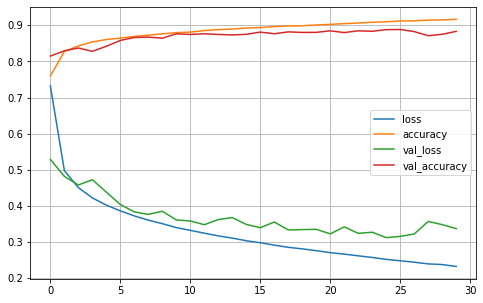

In [45]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylin(0, 1)
plt.show()

In [47]:
X_test.shape

(10000, 28, 28)

In [48]:
y_test.shape

(10000,)

In [50]:
pred = model.predict(X_test)

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 82.1664 - accuracy: 0.8296


[82.1664047241211, 0.8295999765396118]